# U.S. Gun Deaths 

An investigation of gun deaths in the U.S. as recorded in a dataset from FiveThirtyEight for the years 2012-2014.  Also used, 2010 Census data for the total U.S. population.

** Open guns.csv and read in contents **

In [603]:
import csv
f = open("guns.csv","r")
csvreader = csv.reader(f)
data = list(csvreader)
data[:5]

[['',
  'year',
  'month',
  'intent',
  'police',
  'sex',
  'age',
  'race',
  'hispanic',
  'place',
  'education'],
 ['1',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '34',
  'Asian/Pacific Islander',
  '100',
  'Home',
  '4'],
 ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'],
 ['3',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '60',
  'White',
  '100',
  'Other specified',
  '4'],
 ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4']]

** Separate header and body **

In [604]:
headers = data[0]
data = data[1:]
headers

['',
 'year',
 'month',
 'intent',
 'police',
 'sex',
 'age',
 'race',
 'hispanic',
 'place',
 'education']

In [605]:
data[:5]

[['1',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '34',
  'Asian/Pacific Islander',
  '100',
  'Home',
  '4'],
 ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'],
 ['3',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '60',
  'White',
  '100',
  'Other specified',
  '4'],
 ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'],
 ['5',
  '2012',
  '02',
  'Suicide',
  '0',
  'M',
  '31',
  'White',
  '100',
  'Other specified',
  '2']]

** Group incident counts by year **

In [606]:
years = []
for row in data:
    years.append(row[1])
    
year_counts = {}

for year in years:
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1

In [607]:
year_counts

{'2012': 33563, '2013': 33636, '2014': 33599}

** Create a datetime object for each incident based on year and month data columns **

In [608]:
import datetime

dates = []
for row in data:
    date = datetime.datetime(year = int(row[1]), month = int(row[2]),day=1)
    dates.append(date)
    
dates[:5]

[datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0)]

** Using the datetime objects group incident counts by year and month **

In [634]:
date_counts = {}
for date in dates:
    if date in date_counts:
        date_counts[date] += 1
    else:
        date_counts[date] = 1
        
date_counts

{datetime.datetime(2012, 1, 1, 0, 0): 2758,
 datetime.datetime(2012, 2, 1, 0, 0): 2357,
 datetime.datetime(2012, 3, 1, 0, 0): 2743,
 datetime.datetime(2012, 4, 1, 0, 0): 2795,
 datetime.datetime(2012, 5, 1, 0, 0): 2999,
 datetime.datetime(2012, 6, 1, 0, 0): 2826,
 datetime.datetime(2012, 7, 1, 0, 0): 3026,
 datetime.datetime(2012, 8, 1, 0, 0): 2954,
 datetime.datetime(2012, 9, 1, 0, 0): 2852,
 datetime.datetime(2012, 10, 1, 0, 0): 2733,
 datetime.datetime(2012, 11, 1, 0, 0): 2729,
 datetime.datetime(2012, 12, 1, 0, 0): 2791,
 datetime.datetime(2013, 1, 1, 0, 0): 2864,
 datetime.datetime(2013, 2, 1, 0, 0): 2375,
 datetime.datetime(2013, 3, 1, 0, 0): 2862,
 datetime.datetime(2013, 4, 1, 0, 0): 2798,
 datetime.datetime(2013, 5, 1, 0, 0): 2806,
 datetime.datetime(2013, 6, 1, 0, 0): 2920,
 datetime.datetime(2013, 7, 1, 0, 0): 3079,
 datetime.datetime(2013, 8, 1, 0, 0): 2859,
 datetime.datetime(2013, 9, 1, 0, 0): 2742,
 datetime.datetime(2013, 10, 1, 0, 0): 2808,
 datetime.datetime(2013, 11,

** Group incident counts by sex and race **

In [610]:
sex_counts = {}
race_counts = {}

for row in data:
    sex = row[5]
    race = row[7]
    if sex in sex_counts:
        sex_counts[sex] += 1
    else:
        sex_counts[sex] = 1
        
    if race in race_counts:
        race_counts[race] += 1
    else:
        race_counts[race] = 1
        
race_counts

{'Asian/Pacific Islander': 1326,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 917,
 'White': 66237}

In [611]:
sex_counts

{'F': 14449, 'M': 86349}

In [632]:
percent_male = sex_counts["M"]/(sex_counts["F"] + sex_counts["M"])
percent_male

0.8566539018631322

** Functions to extract key and value data from a dictionary **

In [614]:
def get_keys(input_dict,mode=None):
    output_list = []
    race_map = {"Asian/Pacific Islander":"A",
               "Black":"B",
               "Hispanic":"H",
               "Native American/Native Alaskan":"N",
               "White":"W"}
    if mode == "r":
        for key in input_dict:
            output_list.append(race_map[key])
    else:
        output_list = input_dict.keys()
            
    return output_list    

In [615]:
def get_values(input_dict):
    output_list = []
    for key in input_dict:
        output_list.append(input_dict[key])
    return output_list

** Create keys and values lists for plotting **

In [616]:
sex_keys = get_keys(sex_counts)
race_keys = get_keys(race_counts,"r")
year_keys = get_keys(year_counts)

In [617]:
sex_values = get_values(sex_counts)
race_values = get_values(race_counts)
year_values = get_values(year_counts)

** Isolate the incidents where the intent was homicide and recalculate race counts **

In [618]:
intents = []
races = []
for row in data:
    intent = row[3]
    race = row[7]
    intents.append(intent)
    races.append(race)

homicide_race_counts = {}

for i, race in enumerate(races):
    if intents[i] == "Homicide":
        if race in homicide_race_counts:
            homicide_race_counts[race] += 1
        else:
            homicide_race_counts[race] = 1
            
homicide_race_counts

{'Asian/Pacific Islander': 559,
 'Black': 19510,
 'Hispanic': 5634,
 'Native American/Native Alaskan': 326,
 'White': 9147}

** Open census.csv and read in contents **

In [619]:
f = open("census.csv",'r')
csvreader = csv.reader(f)
data = list(csvreader)
data

[['Id',
  'Year',
  'Id',
  'Sex',
  'Id',
  'Hispanic Origin',
  'Id',
  'Id2',
  'Geography',
  'Total',
  'Race Alone - White',
  'Race Alone - Hispanic',
  'Race Alone - Black or African American',
  'Race Alone - American Indian and Alaska Native',
  'Race Alone - Asian',
  'Race Alone - Native Hawaiian and Other Pacific Islander',
  'Two or More Races'],
 ['cen42010',
  'April 1, 2010 Census',
  'totsex',
  'Both Sexes',
  'tothisp',
  'Total',
  '0100000US',
  '',
  'United States',
  '308745538',
  '197318956',
  '44618105',
  '40250635',
  '3739506',
  '15159516',
  '674625',
  '6984195']]

** Pair census data race labels to population counts **

In [620]:
census = {data[0][10]:int(data[1][9]),
         data[0][11]:int(data[1][10]),
         data[0][12]:int(data[1][11]),
         data[0][13]:int(data[1][12]),
          data[0][14]:int(data[1][13]),
         data[0][15]:int(data[1][14])}
census

{'Race Alone - American Indian and Alaska Native': 40250635,
 'Race Alone - Asian': 3739506,
 'Race Alone - Black or African American': 44618105,
 'Race Alone - Hispanic': 197318956,
 'Race Alone - Native Hawaiian and Other Pacific Islander': 15159516,
 'Race Alone - White': 308745538}

** Map guns data race labels to census population counts **

In [621]:
mapping = {"Asian/Pacific Islander":census["Race Alone - Asian"] + census["Race Alone - Native Hawaiian and Other Pacific Islander"],
          "Black":census["Race Alone - Black or African American"],
          "Hispanic":census["Race Alone - Hispanic"],
          "Native American/Native Alaskan":census["Race Alone - American Indian and Alaska Native"],
          "White":census["Race Alone - White"]}

** Recalculate race counts as a rate of gun deaths per 100,000 people of each race **

In [622]:
race_per_100000={}

for race in race_counts:
    value = race_counts[race]/mapping[race]
    race_per_100000[race] = value * 100000
    
race_per_100000

{'Asian/Pacific Islander': 7.016236078247858,
 'Black': 52.211988832784364,
 'Hispanic': 4.572292588047142,
 'Native American/Native Alaskan': 2.278224927383133,
 'White': 21.453589395678975}

In [623]:
rp100000_keys = get_keys(race_per_100000,"r")
rp100000_values = get_values(race_per_100000)

** Recalculate homicide gun deaths as a rate of gun deaths per 100,000 people of each race **

In [625]:
for race in homicide_race_counts:
    value = homicide_race_counts[race]/mapping[race]
    homicide_race_counts[race]=value*100000
    
homicide_race_counts    

{'Asian/Pacific Islander': 2.9578250133789994,
 'Black': 43.7266441503959,
 'Hispanic': 2.8552755975457322,
 'Native American/Native Alaskan': 0.8099251104982568,
 'White': 2.9626339085748987}

In [626]:
homicide_race_keys = get_keys(homicide_race_counts,"r")
homicide_race_values = get_values(homicide_race_counts)

** Function to plot key/value pairs as a bar graph **

In [624]:
def plot_bargraph(keys_list, values_list, mode=None):
    import matplotlib.pyplot as plt
    import numpy as np

    y_pos = np.arange(len(keys_list))

    plt.bar(y_pos, values_list,align = 'center', alpha = 0.5)
    plt.xticks(y_pos, keys_list)
    
    plt.show()

### US Gun Deaths by Race and Sex

#### Sex
Examining gun deaths by sex shows that American males were significantly more likely of die of gun related injuries with 86349 reported incidents, compared to 14449 reported incidents involving female victims.

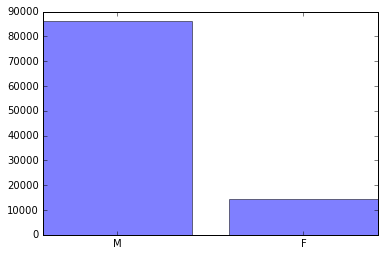

In [627]:
%matplotlib inline

plot_bargraph(sex_keys, sex_values)

#### Race
Examining gun deaths by race for 2012 - 2014 shows victims who were ethnically White accounted for more than 65% of all gun related deaths with more than 66,237 reported incidents; 23,296 for victims of Black ethnicity.

A = Asian/Pacific Islander

B = Black

H = Hispanic

N = Native American/Native Alaskan

W = White

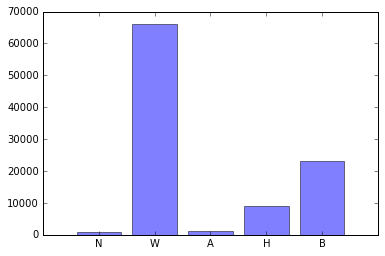

In [628]:
plot_bargraph(race_keys, race_values,"r")

### Gun Deaths by Year
There is little yearly variation in the number of reported gun related deaths for the years 2012-2014


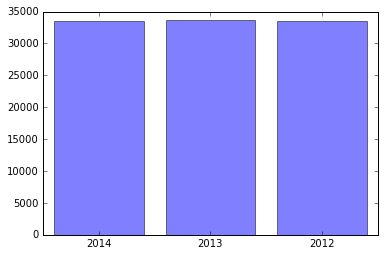

In [629]:
plot_bargraph(year_keys, year_values)

### Gun Deaths Rates per 100,000 People by Race
For the years 2012-2014 roughly 52 out of every 100,000 ethnically Black Americans were likely to be a victim of a gun-related homicide, compared to 21 out of every 100,000 for ethnically White Americans.  This shows that although there were more White victims in the years investigated, Black Americans were still more likely to be killed by a gun.


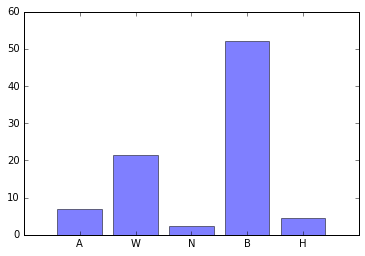

In [630]:
plot_bargraph(rp100000_keys, rp100000_values,mode="r")

### Homicide Gun Death Rates per 100,000 People by Race

For the years 2012-2014 roughly 43 out of every 100,000 ethnically Black Americans were likely to be a victim of a gun-related homicide, relatively speaking this rate is nearly 20 times larger than the gun related homicide rates associated with other races in this study.

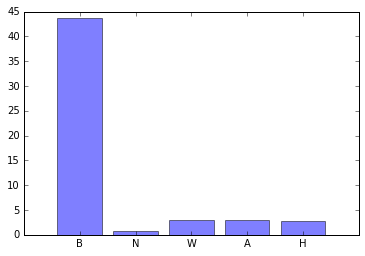

In [631]:
plot_bargraph(homicide_race_keys,homicide_race_values,mode="r")

In further pursuit of this investigation, it would be interesting to see how other intents affect  gun  death  rates; also how gun death counts compare when grouped by where the shooting occurred and the education level of the victim.